In [30]:
import matplotlib.pyplot as plt

In [71]:
project_root = '/home/akarshkumar0101/nba-3d'

In [72]:
class Node():
    def __init__(self, name):
        self.name = name
        self.references = []
        self.references_me = []
        self.children = []
# class Folder(Node):
#     def __init__(self, name):
#         super().__init__(name)
#         self.children = []
# class File(Node):
#     def __init__(self, name):
#         super().__init__(name)
#         self.functions = []
#         self.classes = []
# class Class(Node):
#     def __init__(self, name):
#         super().__init__(name)
#         self.functions =  []
# class Function(Node):
#     def __init__(self, name):
#         super().__init__(name)
# class Instance(Node):
#     def __init__(self, name):
#         super().__init__(name)

In [73]:
import os
import jedi
project = jedi.Project(project_root)

structure = {}
for root, dirs, files in os.walk(project_root):
    folder = '.'+root[len(project_root):]
    if '.git' in root or 'ball_tracking' in root:
        continue
    substruct = {}
    
    for file in files:
        if '.py' in file:
            script = jedi.Script(path=root+'/'+file, project=project)
            substruct[file] = script
    structure[folder] = substruct
    


In [74]:
root = Node('.')

In [75]:

def find_node_impl(root, ph):
    if len(ph)==0:
        return root
    for child in root.children:
        if child.name.name == ph[0].name:
            return find_node_impl(child, ph[1:])
    return None
    
def find_node(root, name):
    ph = get_parent_hierarchy(name)
    return find_node_impl(root, ph)

def get_parent_hierarchy(name):
    l = [name]
    while name.parent() is not None:
        l.append(name.parent())
        name = name.parent()
    l.reverse()
    return l

def register_node_impl(root, name):
    for child in root.children:
        if child.name.name == name.name:
            return child
        
    node = Node(name)
    root.children.append(node)
    return node
        
def register_node(root, name):
    ph = get_parent_hierarchy(name)
    for n in ph:
        root = register_node_impl(root, n)
    return root


In [76]:
for s, vs in structure.items():
    for file, script in vs.items():
        for name in script.get_names(definitions=True, references=False):
            if name.type=='module':
                pass
            if name.type=='function' or name.type=='class':
                node = register_node(root, name)
                for ref in script.get_references(name.line, name.column):
                    refnode = register_node(root, ref)
                    node.references_me.append(refnode)


In [77]:
print(root.children[0].children[0].name)
print(root.children[0].children[0].references_me[1].name)
print(root.children[0].children[1].name)

<Name full_name='tactile_util.rotation_from_matrix', description='def rotation_from_matrix'>
<Name full_name='tactile_util.rotation_from_matrix', description='def rotation_from_matrix'>
<Name full_name='tactile_util.translation_from_matrix', description='def translation_from_matrix'>


In [78]:
def print_node(node):
    print('printing node: ', node.name)
    if type(node.name) is not str:
        print(node.name.type)
    print("Children:")
    for child in node.children:
        print_node(child)
        
    print()

# print_node(root)

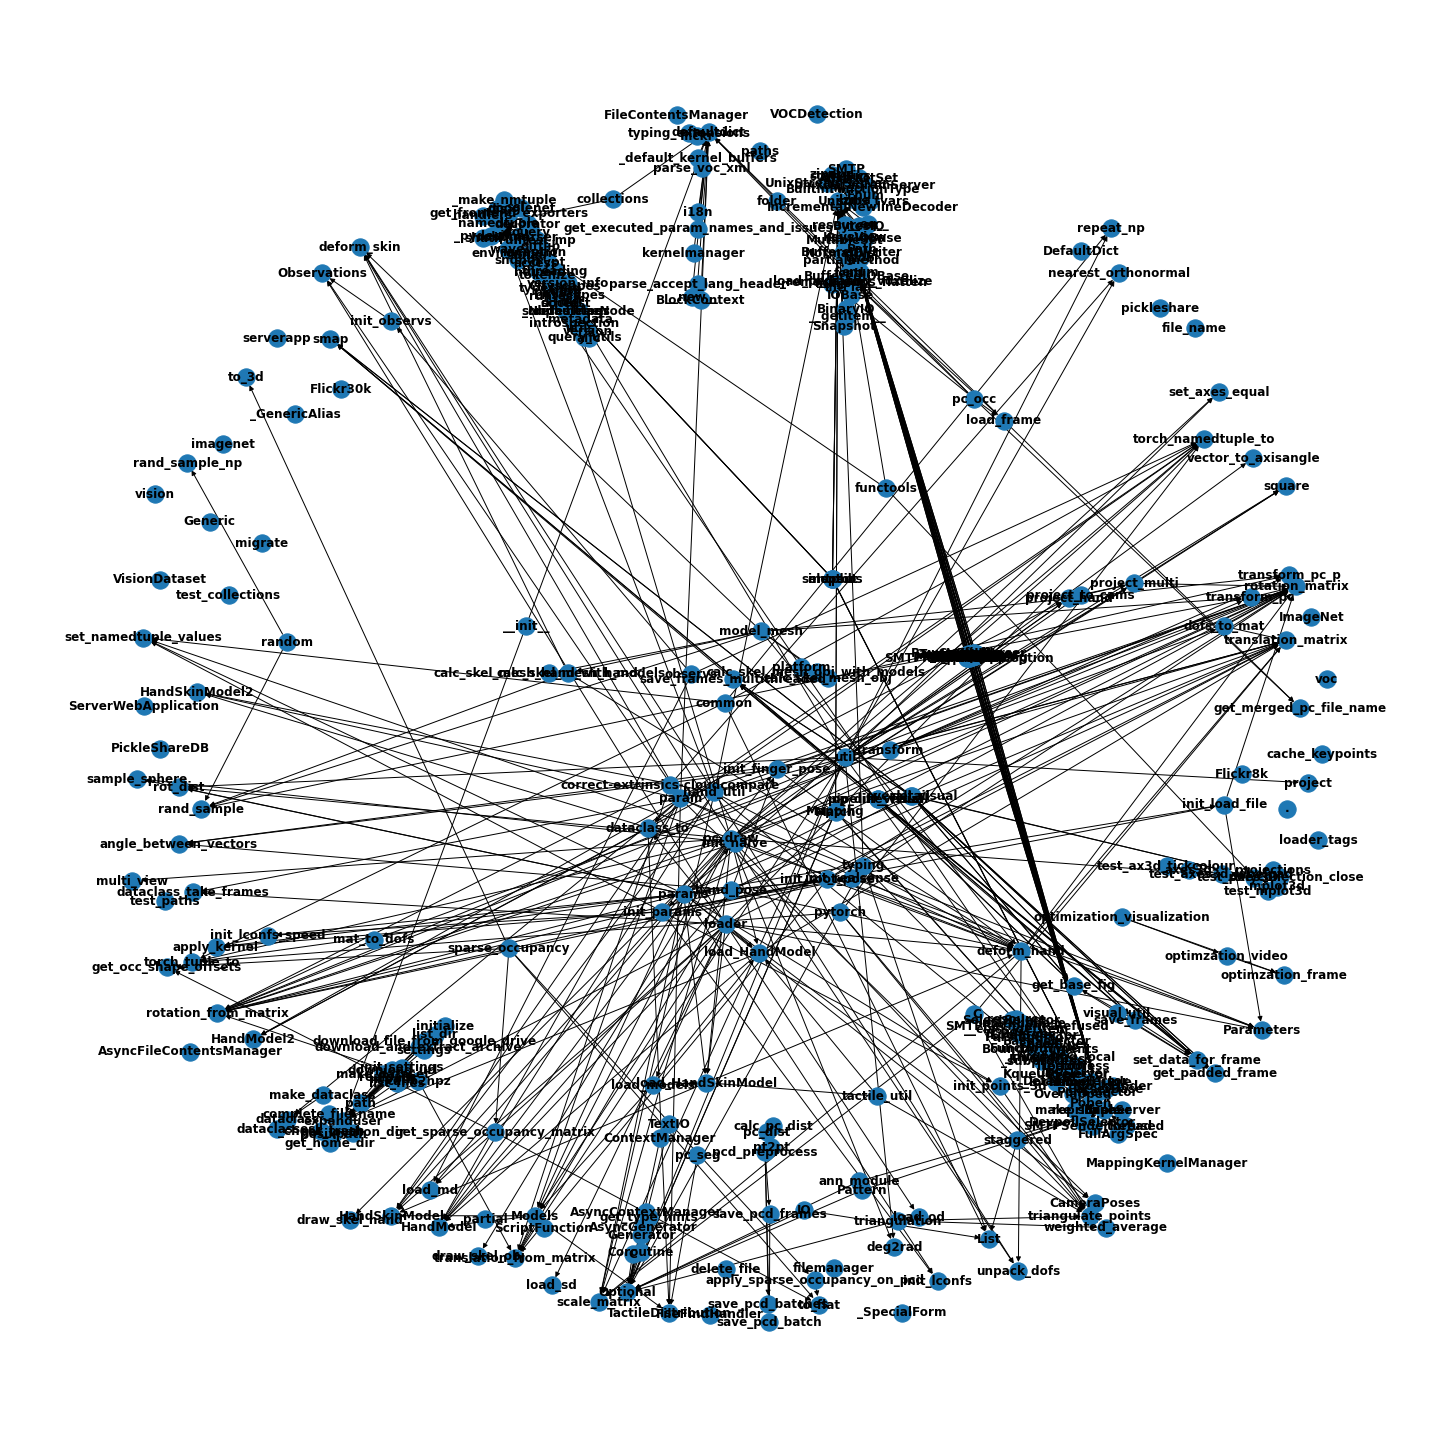

In [81]:
import networkx as nx


G = nx.DiGraph()

def add_node_to_viz(G, root):
    if type(root.name) is str:
        G.add_node(root.name)
    else:
        G.add_node(root.name.name)
    for child in root.children:
        add_node_to_viz(G, child)
def add_edge_to_viz(G, root):
    for ref in root.references_me:
        G.add_edge(ref.name.parent().name, root.name.name)
    for child in root.children:
        add_edge_to_viz(G, child)
    
add_node_to_viz(G, root)
add_edge_to_viz(G, root)


# add_node_to_viz(G, root.children[0].children[0])
# add_node_to_viz(G, root.children[0].children[1])

# add_edge_to_viz(G, root.children[0].children[1])
# add_edge_to_viz(G, root.children[0].children[0])



plt.figure(figsize=(20,20))
nx.draw(G, with_labels=True, font_weight='bold')